In [1]:

# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [2]:
import pandas as pd

# Load GPS data with path
with open('./Data/2/GPS/gps_2023-05-10.log', 'r') as file:
    lines = file.readlines()

# Filtering out clean data 
cleaned_data = []
for line in lines:
    line = line.strip()
    if line:
        # Split the line by semicolon ';'
        data_elements = line.split(';')
        # Check if the line has exactly 7 elements and ends with a '/'
        if len(data_elements) == 7 and data_elements[-1].strip() == '/':
            # Append to the cleaned_data
            cleaned_data.append(data_elements[:-1])  # Discard the last element (slash)

# Create a DataFrame from the cleaned data
column_names = ['Date', 'Time', 'Latitude', 'Longitude', 'Speed', 'TrackAngle']
data_gps2 = pd.DataFrame(cleaned_data, columns=column_names)

# Data cleaning and formatting
data_gps2['Latitude'] = data_gps2['Latitude'].str.rstrip('N').astype(float)
data_gps2['Longitude'] = data_gps2['Longitude'].str.rstrip('E').astype(float)

print(data_gps2)




             Date      Time  Latitude  Longitude Speed TrackAngle
0      09/05/2023  22:01:00   53.9432    10.8564  0.16          0
1      09/05/2023  22:01:01   53.9432    10.8564  0.16          0
2      09/05/2023  22:01:03   53.9432    10.8564   0.1          0
3      09/05/2023  22:01:04   53.9432    10.8564  0.14          0
4      09/05/2023  22:01:05   53.9432    10.8564  0.14          0
...           ...       ...       ...        ...   ...        ...
68912  10/05/2023  21:59:54   53.8353    10.5099   0.6     203.21
68913  10/05/2023  21:59:55   53.8353    10.5099  0.22     203.21
68914  10/05/2023  21:59:56   53.8353    10.5099  0.31     203.21
68915  10/05/2023  21:59:57   53.8353    10.5099  0.38     203.21
68916  10/05/2023  21:59:58   53.8353    10.5099  0.45     203.21

[68917 rows x 6 columns]


In [3]:
# Merge 'Date' and 'Time' columns into a single datetime column
data_gps2['Datetime'] = pd.to_datetime(data_gps2['Date'] + ' ' + data_gps2['Time'], format='%d/%m/%Y %H:%M:%S')

# Convert the datetime column to Unix format in milliseconds
data_gps2['UnixTimeStampInMsec'] = (data_gps2['Datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(milliseconds=1)

# Reorder the columns, moving 'UnixTimeInMSec' to the first position
data_gps2 = data_gps2[['UnixTimeStampInMsec', 'Datetime', 'Latitude', 'Longitude', 'Speed', 'TrackAngle']]

# Print the DataFrame with Unix timestamps in the first column
print(data_gps2)


       UnixTimeStampInMsec            Datetime  Latitude  Longitude Speed  \
0            1683669660000 2023-05-09 22:01:00   53.9432    10.8564  0.16   
1            1683669661000 2023-05-09 22:01:01   53.9432    10.8564  0.16   
2            1683669663000 2023-05-09 22:01:03   53.9432    10.8564   0.1   
3            1683669664000 2023-05-09 22:01:04   53.9432    10.8564  0.14   
4            1683669665000 2023-05-09 22:01:05   53.9432    10.8564  0.14   
...                    ...                 ...       ...        ...   ...   
68912        1683755994000 2023-05-10 21:59:54   53.8353    10.5099   0.6   
68913        1683755995000 2023-05-10 21:59:55   53.8353    10.5099  0.22   
68914        1683755996000 2023-05-10 21:59:56   53.8353    10.5099  0.31   
68915        1683755997000 2023-05-10 21:59:57   53.8353    10.5099  0.38   
68916        1683755998000 2023-05-10 21:59:58   53.8353    10.5099  0.45   

      TrackAngle  
0              0  
1              0  
2              0  

In [4]:
# Summary statistics
print("Summary Statistics:")
print(data_gps2.describe())

Summary Statistics:
       UnixTimeStampInMsec                       Datetime      Latitude  \
count         6.891700e+04                          68917  68917.000000   
mean          1.683713e+12  2023-05-10 10:03:42.738279424     53.876192   
min           1.683670e+12            2023-05-09 22:01:00     53.820400   
25%           1.683691e+12            2023-05-10 03:59:56     53.835100   
50%           1.683714e+12            2023-05-10 10:18:47     53.835300   
75%           1.683731e+12            2023-05-10 15:08:50     53.943200   
max           1.683756e+12            2023-05-10 21:59:58     53.943400   
std           2.444956e+07                            NaN      0.052246   

          Longitude  
count  68917.000000  
mean      10.642034  
min       10.494500  
25%       10.509800  
50%       10.509900  
75%       10.856400  
max       10.859000  
std        0.167193  


In [5]:
# Save the DataFrame to a CSV file
data_gps2.to_csv('./CleanData/Set2/GPSSet2Data.csv', index=False)

print("DataFrame saved as GPSSet1Data.csv in the CleanData/Set2/ Folder.")

DataFrame saved as GPSSet1Data.csv in the CleanData/Set2/ Folder.


#### Load and Analyze second set Shock Data

In [6]:
import pandas as pd

# Replace 'your_data.txt' with the path to your data file
with open('./Data/2/shock/shock_2023-05-10.log', 'r') as file:
    lines = file.readlines()

# Clean and process the lines
cleaned_lines = []
for line_idx, line in enumerate(lines):
    line = line.strip()
    if line:
        # Split the line by semicolon ';'
        data_elements = line.split(';')
        # Check if the line has 8 elements (7 data columns + 1 timestamp)
        if len(data_elements) == 8:
            # Check if all elements in the row are numeric
            if all(pd.to_numeric(pd.Series(data_elements), errors='coerce').notnull()):
                # If all elements are numeric, keep the row
                cleaned_lines.append(data_elements)
            else:
                print(f"Row {line_idx+1} has non-numeric data. Discarding the row.")
        else:
            print(f"Row {line_idx+1} does not have the correct number of columns. Discarding the row.")

# Check if the first column name is 'Timestamp'
if cleaned_lines[0][0] != 'Timestamp':
    # Change the column names accordingly
    column_names = ['Timestamp', 'AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'Temperature']
else:
    column_names = cleaned_lines[0]

# Create a DataFrame from the cleaned data
data_shock2 = pd.DataFrame(cleaned_lines[1:], columns=column_names)


Row 1 has non-numeric data. Discarding the row.
Row 1994 does not have the correct number of columns. Discarding the row.
Row 8850 does not have the correct number of columns. Discarding the row.
Row 9936 does not have the correct number of columns. Discarding the row.
Row 24329 does not have the correct number of columns. Discarding the row.
Row 346150 does not have the correct number of columns. Discarding the row.


In [7]:
# Renaming Timestamp column name 
data_shock2.rename(columns={'Timestamp': 'UnixTimeStampInMsec'}, inplace=True)
print(data_shock2)


       UnixTimeStampInMsec     AccelX     AccelY    AccelZ     GyroX  \
0            1683669630663   0.002776   0.000516  9.923157  0.009163   
1            1683669630746   0.000230   0.000377  9.919678  0.008858   
2            1683669630830  -0.000812   0.002910  9.923219  0.009163   
3            1683669630913   0.002775   0.001711  9.923110  0.009163   
4            1683669630996   0.003819  -0.003213  9.919663  0.009163   
...                    ...        ...        ...       ...       ...   
853042       1683755999627   0.005431  -0.008674  9.928580  0.009163   
853043       1683755999711   0.002988  -0.004009  9.926007  0.009468   
853044       1683755999795   0.002942  -0.008904  9.923849  0.009163   
853045       1683755999879   0.000597  -0.006398  9.926171  0.008858   
853046       1683755999963   0.001769  -0.007651  9.925010  0.009163   

            GyroY      GyroZ Temperature  
0       -0.003360  -0.009468   36.000000  
1       -0.003971  -0.009468   36.000000  
2     

In [8]:
# Save the DataFrame to a CSV file
data_shock2.to_csv('./CleanData/Set2/ShockSet2Data.csv', index=False)

print("DataFrame saved as ShockSet1Data.csv in the CleanData/Set2 Folder.")

DataFrame saved as ShockSet1Data.csv in the CleanData/Set2 Folder.


Merging GPS Data and Shock Data for further analysis

In [9]:
print(data_gps2)

       UnixTimeStampInMsec            Datetime  Latitude  Longitude Speed  \
0            1683669660000 2023-05-09 22:01:00   53.9432    10.8564  0.16   
1            1683669661000 2023-05-09 22:01:01   53.9432    10.8564  0.16   
2            1683669663000 2023-05-09 22:01:03   53.9432    10.8564   0.1   
3            1683669664000 2023-05-09 22:01:04   53.9432    10.8564  0.14   
4            1683669665000 2023-05-09 22:01:05   53.9432    10.8564  0.14   
...                    ...                 ...       ...        ...   ...   
68912        1683755994000 2023-05-10 21:59:54   53.8353    10.5099   0.6   
68913        1683755995000 2023-05-10 21:59:55   53.8353    10.5099  0.22   
68914        1683755996000 2023-05-10 21:59:56   53.8353    10.5099  0.31   
68915        1683755997000 2023-05-10 21:59:57   53.8353    10.5099  0.38   
68916        1683755998000 2023-05-10 21:59:58   53.8353    10.5099  0.45   

      TrackAngle  
0              0  
1              0  
2              0  

In [10]:
print(data_shock2)

       UnixTimeStampInMsec     AccelX     AccelY    AccelZ     GyroX  \
0            1683669630663   0.002776   0.000516  9.923157  0.009163   
1            1683669630746   0.000230   0.000377  9.919678  0.008858   
2            1683669630830  -0.000812   0.002910  9.923219  0.009163   
3            1683669630913   0.002775   0.001711  9.923110  0.009163   
4            1683669630996   0.003819  -0.003213  9.919663  0.009163   
...                    ...        ...        ...       ...       ...   
853042       1683755999627   0.005431  -0.008674  9.928580  0.009163   
853043       1683755999711   0.002988  -0.004009  9.926007  0.009468   
853044       1683755999795   0.002942  -0.008904  9.923849  0.009163   
853045       1683755999879   0.000597  -0.006398  9.926171  0.008858   
853046       1683755999963   0.001769  -0.007651  9.925010  0.009163   

            GyroY      GyroZ Temperature  
0       -0.003360  -0.009468   36.000000  
1       -0.003971  -0.009468   36.000000  
2     

In [11]:
# Check datatype of common column for merging
print(data_gps2['UnixTimeStampInMsec'].dtype)
print(data_shock2['UnixTimeStampInMsec'].dtype)

int64
object


In [13]:
# Convert 'UnixTimeStampInMsec' column to object type in data_gps2 DataFrame
data_gps2['UnixTimeStampInMsec'] = data_gps2['UnixTimeStampInMsec'].astype(str)

# Check datatype of common column for merging
print(data_gps2['UnixTimeStampInMsec'].dtype)
print(data_shock2['UnixTimeStampInMsec'].dtype)


object
object


In [18]:
# Merge the two DataFrames based on the 'UnixTimeStampInMsec' column
combined_data_set2 = pd.merge(data_gps2, data_shock2, on='UnixTimeStampInMsec', how='inner')
print(combined_data_set2)

# Save the DataFrame to a CSV file
combined_data_set2.to_csv('./CleanData/Set2/MergedDataSet2.csv', index=False)
print("DataFrame saved as MergedDataSet2.csv in the CleanData/Set2 Folder.")

    UnixTimeStampInMsec            Datetime  Latitude  Longitude Speed  \
0         1683670042000 2023-05-09 22:07:22   53.9431    10.8564   0.1   
1         1683670254000 2023-05-09 22:10:54   53.9431    10.8565  0.03   
2         1683670255000 2023-05-09 22:10:55   53.9431    10.8565  0.12   
3         1683670547000 2023-05-09 22:15:47   53.9432    10.8564  0.17   
4         1683670548000 2023-05-09 22:15:48   53.9432    10.8564  0.51   
..                  ...                 ...       ...        ...   ...   
783       1683755761000 2023-05-10 21:56:01   53.8352    10.5098  0.24   
784       1683755772000 2023-05-10 21:56:12   53.8352    10.5099   0.1   
785       1683755849000 2023-05-10 21:57:29   53.8352    10.5099  0.09   
786       1683755860000 2023-05-10 21:57:40   53.8352    10.5099  0.72   
787       1683755973000 2023-05-10 21:59:33   53.8353    10.5099  0.16   

    TrackAngle     AccelX     AccelY    AccelZ     GyroX      GyroY  \
0        45.61  -0.001890  -0.000811  9.

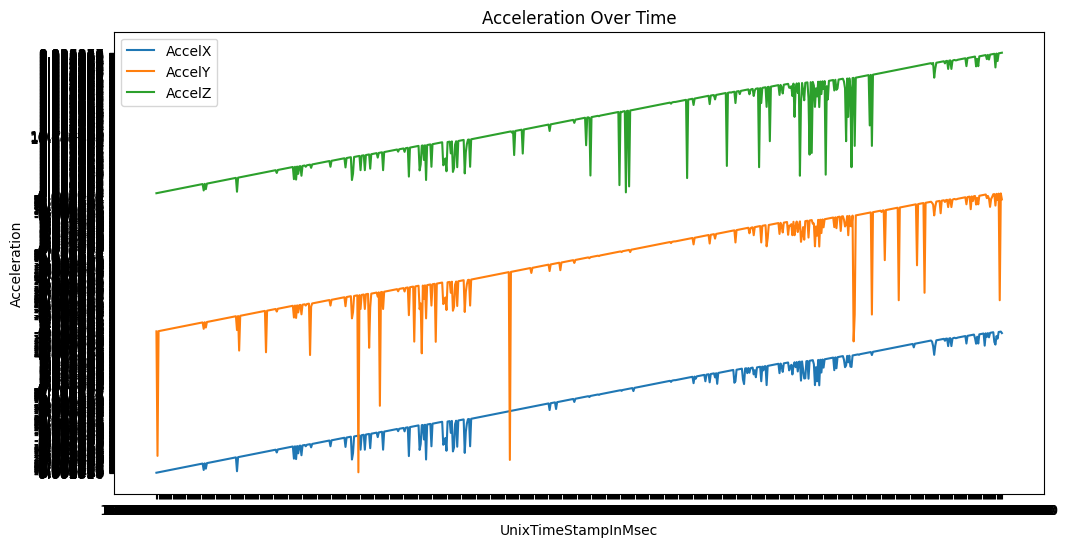

In [15]:

# Data Visualization
# Plot time series data of shock and GPS parameters
plt.figure(figsize=(12, 6))
plt.plot(combined_data_set2['UnixTimeStampInMsec'], combined_data_set2['AccelX'], label='AccelX')
plt.plot(combined_data_set2['UnixTimeStampInMsec'], combined_data_set2['AccelY'], label='AccelY')
plt.plot(combined_data_set2['UnixTimeStampInMsec'], combined_data_set2['AccelZ'], label='AccelZ')
plt.xlabel('UnixTimeStampInMsec')
plt.ylabel('Acceleration')
plt.title('Acceleration Over Time')
plt.legend()
plt.show()


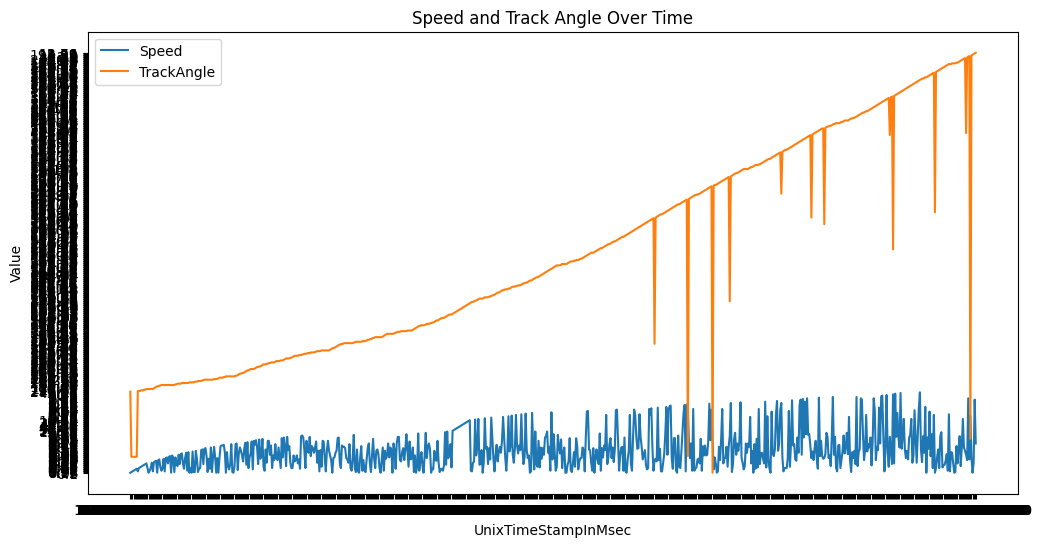

In [16]:
# Plot speed and track angle
plt.figure(figsize=(12, 6))
plt.plot(combined_data_set2['UnixTimeStampInMsec'], combined_data_set2['Speed'], label='Speed')
plt.plot(combined_data_set2['UnixTimeStampInMsec'], combined_data_set2['TrackAngle'], label='TrackAngle')
plt.xlabel('UnixTimeStampInMsec')
plt.ylabel('Value')
plt.title('Speed and Track Angle Over Time')
plt.legend()
plt.show()

d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

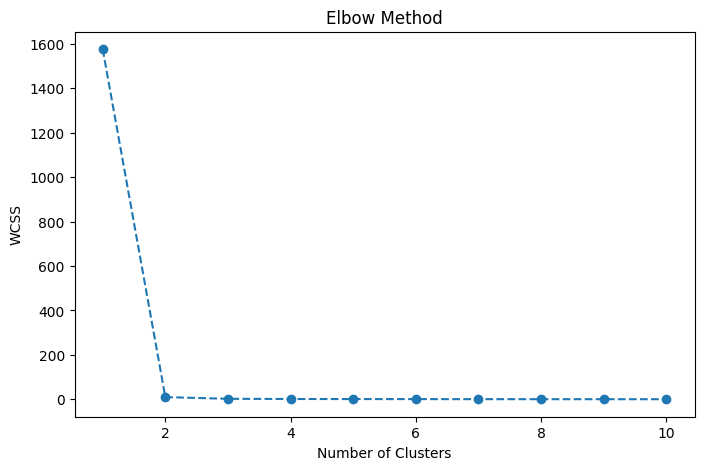

d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


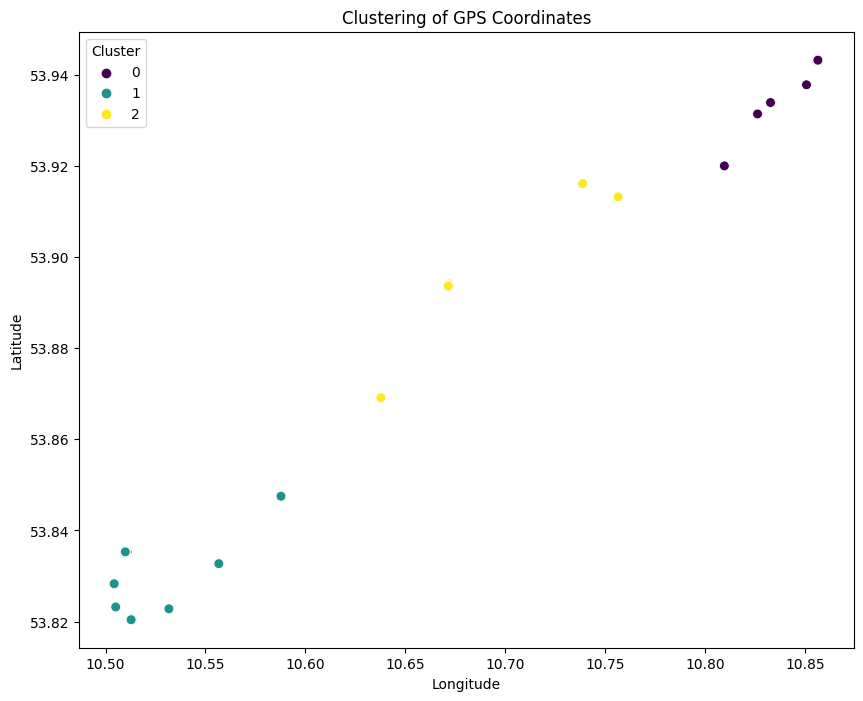

In [17]:
# Perform K-means clustering on data (Latitude and Longitude)
clustered_data = combined_data_set2[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
merged_gps_data_scaled = scaler.fit_transform(clustered_data)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(merged_gps_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters and fit the K-means model
num_clusters = 3  # You can adjust this based on the Elbow plot
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
combined_data_set2['Cluster'] = kmeans.fit_predict(merged_gps_data_scaled)

# Visualize the clusters on a map
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=combined_data_set2, palette='viridis', s=50)
plt.title('Clustering of GPS Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
